In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Presentación de resultados
En este notebook se presentarán los resultados que se obtuvieron de los diferentes experimentos

In [23]:
validations = pd.read_csv('utils/max_scoresv2.csv')

In [30]:
ideal_score = validations.loc[validations['fecha'] == '2016-05-28', 'clean_max_score'].values

### Resultados del experimento 6 (Meses individuales)

In [2]:
exp6_rf_purch = pd.read_csv('scripts/results/experiment6_RF_PURCHASERS.csv')
exp6_rf_orig = pd.read_csv('scripts/results/experiment6_RF_ORIGINAL.csv')
exp6_dt_purch = pd.read_csv('scripts/results/experiment6_DT_PURCHASERS.csv')
exp6_dt_orig = pd.read_csv('scripts/results/experiment6_DT_ORIGINAL.csv')

dates = exp6_dt_orig.loc[:, 'date'].values

score_exp6_dt_orig = exp6_dt_orig.loc[:, 'score'].values
score_exp6_rf_orig = exp6_rf_orig.loc[:, 'score'].values
score_exp6_dt_purch = np.insert(exp6_dt_purch.loc[:, 'score'].values, 0, None)
score_exp6_rf_purch = np.insert(exp6_rf_purch.loc[:, 'score'].values, 0, None)

In [212]:
exp6_rf_purchold = pd.read_csv('scripts/results/old/experiment6_purcharsers.csv')
exp6_dt_purchold = pd.read_csv('scripts/results/old/experiment6_DT_purcharsers.csv')
score_exp6_rf_purchold = np.insert(exp6_rf_purchold.loc[:, 'score'].values, 0, None)
score_exp6_dt_purchold = np.insert(exp6_dt_purchold.loc[:, 'score'].values, 0, None)

Para un mejor entendimiento los algoritmos tendrán la siguiente representación:
* DecisionTreeClassifier será DT
* RandomForestClassifier será RF

Los datasets tendrán la siguiente:
* Dataset con datos iniciales - ALL
* Dataset con sólo los compradores - PURCHASERS

In [213]:
scores_exp6 = [score_exp6_dt_orig, score_exp6_rf_orig, score_exp6_dt_purch, score_exp6_rf_purch, score_exp6_dt_purchold,
               score_exp6_rf_purchold]

In [221]:
series_exp6 = np.array(['DT - ALL', 'RF - ALL', 'DT - PURCHASERS', 'RF - PURCHASERS', 'DT - PURCH OLD', 'RF - PURCH OLD'])

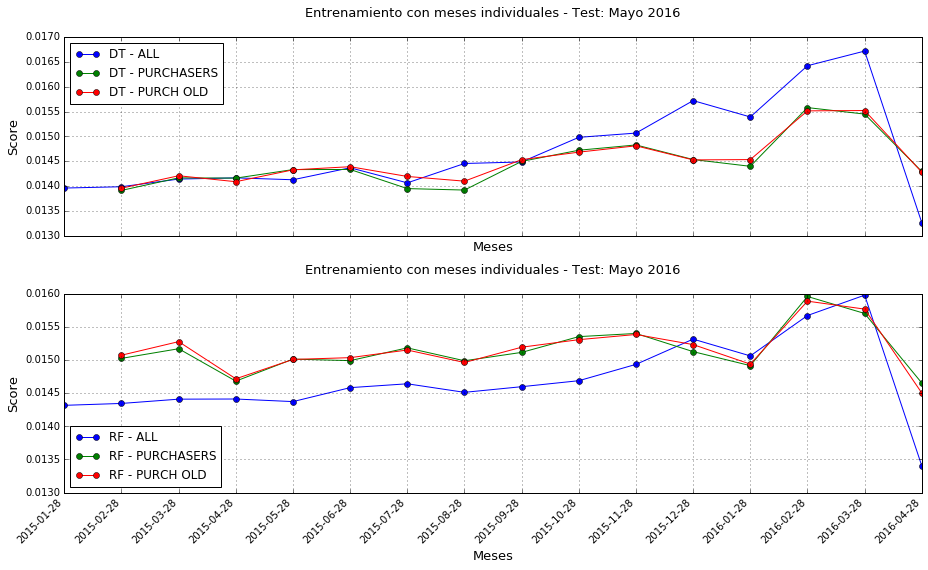

In [227]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(13, 8))
for j, ax in enumerate(axes):
    for i in range(j ,len(scores_exp6), 2):
        ax.plot(scores_exp6[i], '-o')
    ax.legend(series_exp6[[k for k in range(j ,len(scores_exp6), 2)]], loc=0)
    ax.set_xticks(range(len(dates)))
    ax.set_xticklabels(dates, rotation=45, ha='right')
    ax.set_title('Entrenamiento con meses individuales - Test: Mayo 2016\n', size=13)
    ax.set_ylabel('Score', size=13)
    ax.set_xlabel('Meses', size=13)
    ax.grid()
plt.tight_layout()

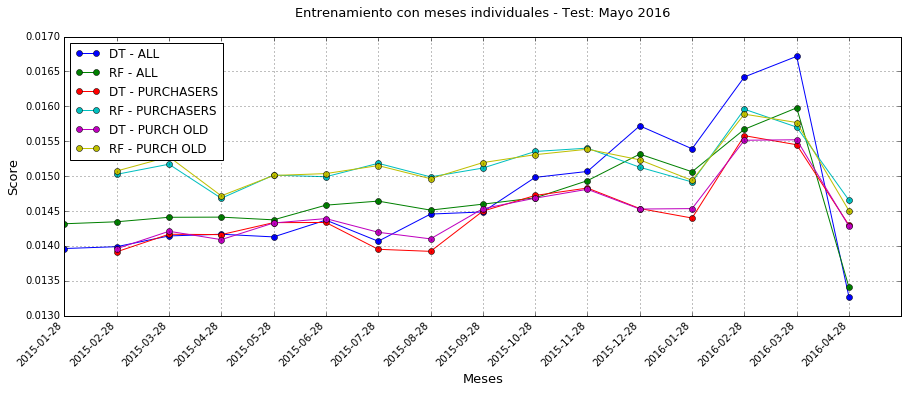

In [220]:
plt.figure(figsize=(15, 5))
for i in scores_exp6:
    plt.plot(i, '-o')
plt.legend(series_exp6, loc=0)
plt.xticks(range(len(dates)), dates, rotation=45, ha='right')
plt.title('Entrenamiento con meses individuales - Test: Mayo 2016\n', size=13)
plt.ylabel('Score', size=13)
plt.xlabel('Meses', size=13)
plt.grid()

In [230]:
for i, score in enumerate(scores_exp6):
    ind_max_score = score.argsort()[-1] if score.argsort()[-1] else score.argsort()[-2]
    max_score = score[ind_max_score]
    perc = max_score*100/ideal_score
    print("{}:".format(series_exp6[i]))
    print("El máximo score es {:.6f} ({}) - representa un {:.3f}% del score ideal".format(max_score,
                                                                                                  dates[ind_max_score],
                                                                                                  perc[0]))
    mean = score[1:].mean() if score.mean() else score.mean()
    print("La media de score es {:.5f} - representa un {:.3f}% del score ideal".format(mean, mean*100/ideal_score[0]))
    print('\n')

DT - ALL:
El máximo score es 0.016716 (2016-03-28) - representa un 58.269% del score ideal
La media de score es 0.01476 - representa un 51.439% del score ideal


RF - ALL:
El máximo score es 0.015978 (2016-03-28) - representa un 55.695% del score ideal
La media de score es 0.01473 - representa un 51.338% del score ideal


DT - PURCHASERS:
El máximo score es 0.015579 (2016-02-28) - representa un 54.305% del score ideal
La media de score es 0.01447 - representa un 50.445% del score ideal


RF - PURCHASERS:
El máximo score es 0.015958 (2016-02-28) - representa un 55.626% del score ideal
La media de score es 0.01515 - representa un 52.814% del score ideal


DT - PURCH OLD:
El máximo score es 0.015520 (2016-03-28) - representa un 54.100% del score ideal
La media de score es 0.01451 - representa un 50.582% del score ideal


RF - PURCH OLD:
El máximo score es 0.015887 (2016-02-28) - representa un 55.380% del score ideal
La media de score es 0.01516 - representa un 52.851% del score ideal




### Resultados del experimento 7 (Meses acumulados)

In [95]:
exp7_rf_purch = pd.read_csv('scripts/results/experiment7_RF_PURCHASERS.csv')
exp7_rf_orig = pd.read_csv('scripts/results/experiment7_RF_ORIGINAL.csv')
exp7_dt_purch = pd.read_csv('scripts/results/experiment7_DT_PURCHASERS.csv')
exp7_dt_orig = pd.read_csv('scripts/results/experiment7_DT_ORIGINAL.csv')

dates = exp7_dt_orig.loc[:, 'date_end'].values

score_exp7_dt_orig = exp7_dt_orig.loc[:, 'score'].values
score_exp7_rf_orig = exp7_rf_orig.loc[:, 'score'].values
score_exp7_dt_purch = np.insert(exp7_dt_purch.loc[:, 'score'].values, 0, None)
score_exp7_rf_purch = np.insert(exp7_rf_purch.loc[:, 'score'].values, 0, None)

In [202]:
exp7_purch_rfold = pd.read_csv('scripts/results/old/experiment7_purcharsers.csv')
score_exp7_rfold = np.insert(exp7_purch_rfold.loc[:, 'score'].values, 0, None)

exp7_purch_dtold = pd.read_csv('scripts/results/old/experiment7_DT_purcharsers.csv')
score_exp7_dtold = np.insert(exp7_purch_dtold.loc[:, 'score'].values, 0, None)

Para un mejor entendimiento los algoritmos tendrán la siguiente representación:
* DecisionTreeClassifier será DT
* RandomForestClassifier será RF

Los datasets tendrán la siguiente:
* Dataset con datos iniciales - ALL
* Dataset con sólo los compradores - PURCHASERS

In [204]:
scores_exp7 = [score_exp7_dt_orig, score_exp7_rf_orig, score_exp7_dt_purch, score_exp7_rf_purch, score_exp7_dtold,
               score_exp7_rfold]

In [196]:
series_exp7 = np.array(['DT - ALL', 'RF - ALL', 'DT - PURCHASERS', 'RF - PURCHASERS', 'DT - PURCH OLD', 'RF - PURCH - OLD'])

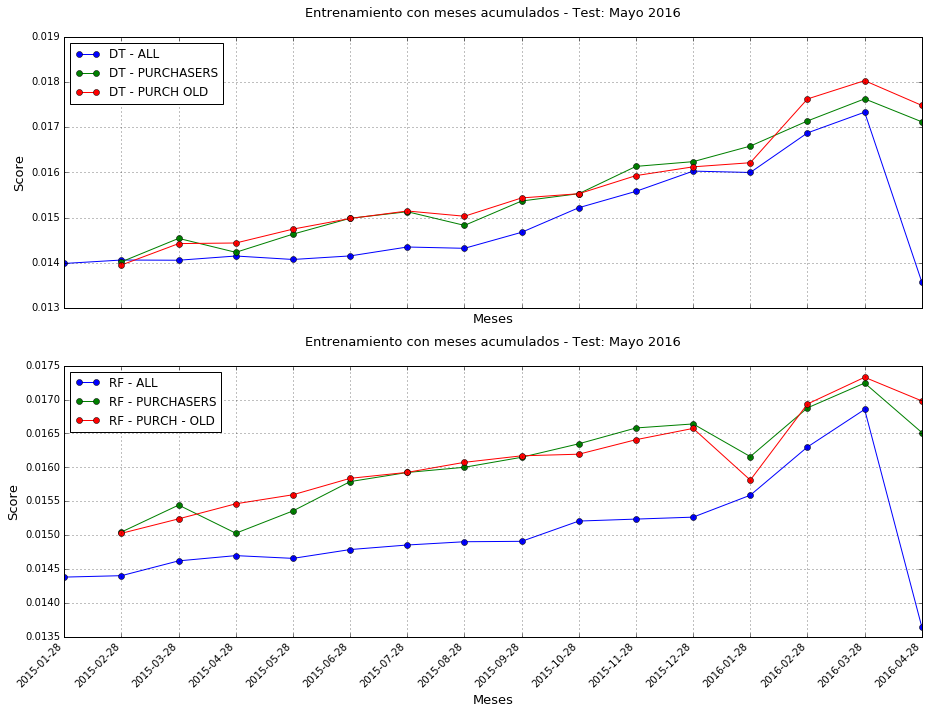

In [228]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(13, 10))
for j, ax in enumerate(axes):
    for i in range(j ,len(scores_exp7), 2):
        ax.plot(scores_exp7[i], '-o')
    ax.legend(series_exp7[[k for k in range(j ,len(scores_exp7), 2)]], loc=0)
    ax.set_xticks(range(len(dates)))
    ax.set_xticklabels(dates, rotation=45, ha='right')
    ax.set_title('Entrenamiento con meses acumulados - Test: Mayo 2016\n', size=13)
    ax.set_ylabel('Score', size=13)
    ax.set_xlabel('Meses', size=13)
    ax.grid()
plt.tight_layout()

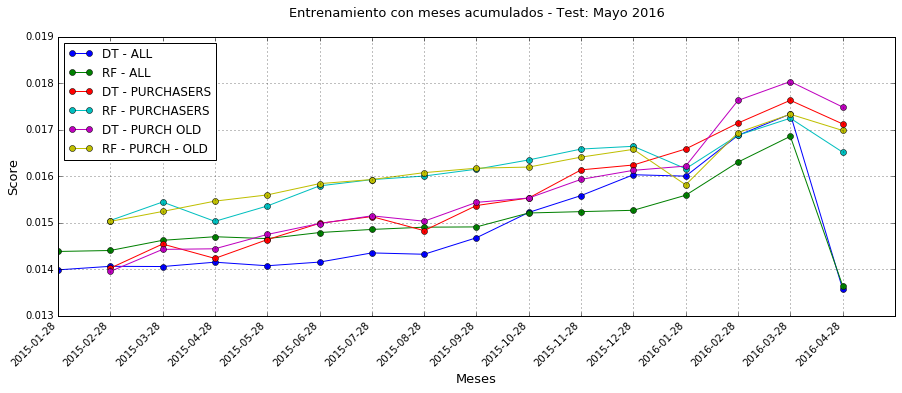

In [209]:
plt.figure(figsize=(15, 5))
for i in scores_exp7:
    plt.plot(i, '-o')
plt.legend(series_exp7, loc=0)
plt.xticks(range(len(dates)), dates, rotation=45, ha='right')
plt.title('Entrenamiento con meses acumulados - Test: Mayo 2016\n', size=13)
plt.ylabel('Score', size=13)
plt.xlabel('Meses', size=13)
plt.grid()

In [231]:
for i, score in enumerate(scores_exp7):
    ind_max_score = score.argsort()[-1] if score.argsort()[-1] else score.argsort()[-2]
    max_score = score[ind_max_score]
    perc = max_score*100/ideal_score
    print("{}:".format(series_exp7[i]))
    print("El máximo score es {:.6f} ({}) - representa un {:.3f}% del score ideal".format(max_score,
                                                                                          dates[ind_max_score],
                                                                                          perc[0]))
    mean = score[1:].mean() if score.mean() else score.mean()
    print("La media de score es {:.5f} - representa un {:.3f}% del score ideal".format(mean, mean*100/ideal_score[0]))
    print('\n')

DT - ALL:
El máximo score es 0.017334 (2016-03-28) - representa un 60.422% del score ideal
La media de score es 0.01496 - representa un 52.152% del score ideal


RF - ALL:
El máximo score es 0.016854 (2016-03-28) - representa un 58.750% del score ideal
La media de score es 0.01506 - representa un 52.495% del score ideal


DT - PURCHASERS:
El máximo score es 0.017629 (2016-03-28) - representa un 61.450% del score ideal
La media de score es 0.01561 - representa un 54.399% del score ideal


RF - PURCHASERS:
El máximo score es 0.017244 (2016-03-28) - representa un 60.108% del score ideal
La media de score es 0.01607 - representa un 56.024% del score ideal


DT - PURCH OLD:
El máximo score es 0.018032 (2016-03-28) - representa un 62.856% del score ideal
La media de score es 0.01567 - representa un 54.627% del score ideal


RF - PURCH - OLD:
El máximo score es 0.017329 (2016-03-28) - representa un 60.405% del score ideal
La media de score es 0.01610 - representa un 56.132% del score ideal




In [173]:
score[1:].mean()

0.016072179581153253